In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
from datetime import date, timedelta
import win32com.client as win32
import teradatasql
import matplotlib.pyplot as plt
plt.style.use('dark_background')

c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [ ]:
user="vitaly.*****"
password="****"
query = '''select * from uat_ca.vf_alladin_all_29052023'''
with teradatasql.connect(host="td2800.corp.tele2.ru", user=user, password=password,logmech="ldap", tmode="TERA" ) as connect:
    df = pd.read_sql(query, connect)
df.head()

In [ ]:
#Оригинальные данные по конвергенту для оценки количества
# pass  
query_2 = '''select * from uat_ca.mc_alladin_subs'''
with teradatasql.connect(host="td2800.corp.tele2.ru", user=user, password=password,logmech="ldap", tmode="TERA" ) as connect:
    df_con = pd.read_sql(query_2, connect)
df_con.head()

C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_13260\1495172990.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_con = pd.read_sql(query_2, connect)


,CREATE_DTTM,EVENT_DATE_TO_RTK,EVENT_DATE_INSTAL,ALLADIN_SYSTEM,LAST_STATUS_NAME,REASON,MSISDN_REQ,SUBS_ID,SERVICE_ID,service_name,SERVICE_STATUS_NAME,VALID_FROM_DTTM,STATUS_CHANGE_REASON_NAME,EVENT_DTTM_REQ,END_STATUS,GR_CHANNEL,abonent
0,2022-12-15 20:08:16,None,NaT,WD,Отменена,Не дозвонились абоненту (финальный звонок),79017428470,3.000468e+11,NaN,None,None,NaT,None,NaT,None,CBM,0
1,2023-05-17 09:52:59,None,NaT,WD,Отменена,Нет связи с клиентом,79822690465,1.000463e+11,NaN,None,None,NaT,None,NaT,None,CBM,0
2,2023-03-14 11:28:43,2023-03-14 11:45:03,2023-03-20 10:15:35,DSUITE,Инсталляция выполнена,Не указана,79637129964,3.000324e+11,27156.0,Домашний интернет 100 Мбит/с (MO),Активна,2023-03-20 10:16:47,Действия пользователя (пользовательская причин...,2023-03-20 10:15:35,Активна,DSUITE,1
3,2023-04-22 14:44:14,None,NaT,DSUITE,Отменена,Не дозвонились абоненту (финальный звонок),79516888808,1.524015e+07,NaN,None,None,NaT,None,NaT,None,DSUITE,0
4,2022-06-13 11:26:21,2022-06-13 12:14:17,2022-06-15 11:28:56,DSUITE,Инсталляция выполнена,Не указана,79774928577,3.000359e+11,27156.0,Домашний интернет 100 Мбит/с (MO),Активна,2022-06-15 11:29:56,Действия пользователя (пользовательская причин...,2022-06-15 11:28:56,None,DSUITE,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416112 entries, 0 to 1416111
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   create_date        1416112 non-null  object        
 1   cluster_name       1413078 non-null  object        
 2   macroregion        1413078 non-null  object        
 3   region             1413078 non-null  object        
 4   branch_id          1413078 non-null  float64       
 5   subs_id            1413078 non-null  float64       
 6   msisdn             1416112 non-null  object        
 7   point_name         1416112 non-null  object        
 8   nps                1416112 non-null  int64         
 9   nps_key            1411141 non-null  float64       
 10  lt_gr              1416112 non-null  object        
 11  age_gr             1416112 non-null  object        
 12  gender             1416112 non-null  object        
 13  CREATE_DTTM        1716 non

Оцениваем распределение

минивывод:

(Имеется неравномерное распределенеие по ТК, тем самым, эффект будет буольше всего оказываться на кц и монобренды и не оказывать на МИ, в то время как распределение nps скошено наоборот в МИ)

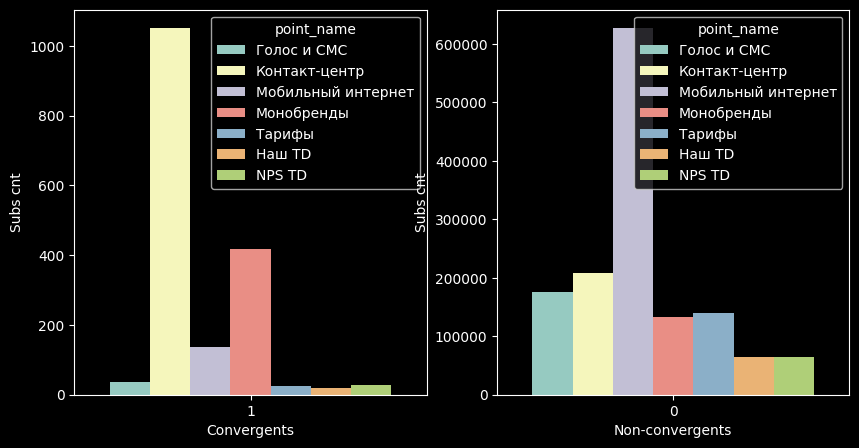

In [8]:
t1 = df.query("flg_conv == 1")
t2 = df.query("flg_conv == 0")
fig, axs = plt.subplots(1, 2, figsize=(10,5))

order = df['point_name'].unique() # получаем уникальные значения исходной переменной
palette = sns.color_palette() # получаем текущую палитру

sns.countplot(x='flg_conv', data=t1, hue='point_name', ax=axs[0], order=[1], hue_order=order, palette=palette) # order=[1, 0] указываем руками фильтр 
sns.countplot(x='flg_conv', data=t2, hue='point_name', ax=axs[1], order=[0], hue_order=order, palette=palette)
axs[0].set_xlabel("Convergents")
axs[1].set_xlabel("Non-convergents")
axs[0].set_ylabel("Subs cnt")
axs[1].set_ylabel("Subs cnt")

# Убираем сетку
axs[0].grid(False)
axs[1].grid(False)

plt.show()


Средний NPS в  разрезе ТК

,point_name,subs_id,diff_day,nps_key
0,NPS TD,61721,27,0.267831
1,Голос и СМС,176404,36,0.405535
2,Контакт-центр,209031,1051,0.181126
3,Мобильный интернет,627321,137,0.250565
4,Монобренды,133988,419,0.559923
5,Наш TD,64146,20,0.371559
6,Тарифы,140467,26,0.392398


,point_name,subs_id,diff_day,nps_key
0,NPS TD,61694,0,0.267684
1,Голос и СМС,176368,0,0.405510
2,Контакт-центр,207980,0,0.178810
3,Мобильный интернет,627184,0,0.250512
4,Монобренды,133569,0,0.559389
5,Наш TD,64126,0,0.371441
6,Тарифы,140441,0,0.392343


,point_name,subs_id,diff_day,nps_key
0,NPS TD,27,27,0.592593
1,Голос и СМС,36,36,0.527778
2,Контакт-центр,1051,1051,0.639391
3,Мобильный интернет,137,137,0.496350
4,Монобренды,419,419,0.730310
5,Наш TD,20,20,0.750000
6,Тарифы,26,26,0.692308


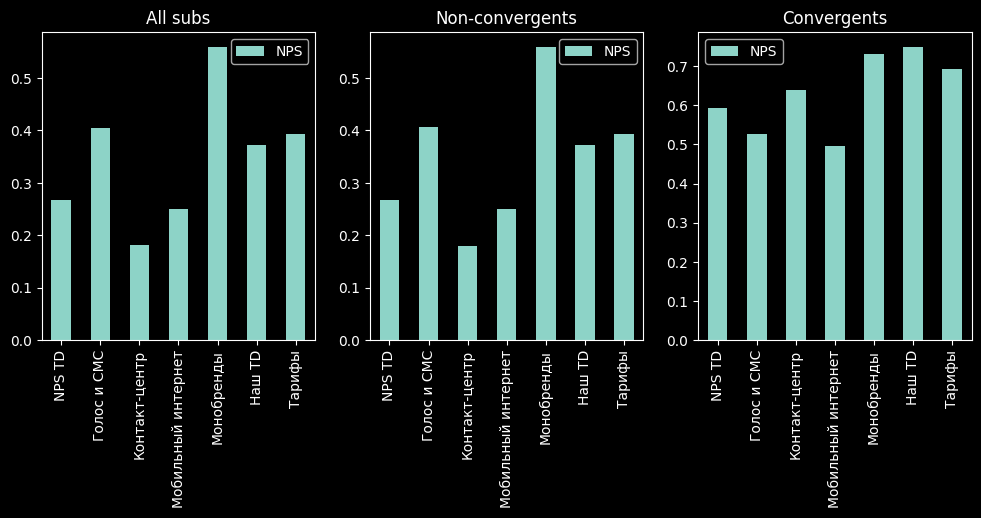

In [384]:
display(df.groupby(['point_name'], as_index=False).agg({"subs_id": "count", "diff_day":"count", "nps_key": "mean" }))
display(df.query("diff_day.isna()").groupby(['point_name'], as_index=False).agg({"subs_id": "count", "diff_day":"count", "nps_key": "mean" }))
display(df.query("diff_day.notna()").groupby(['point_name'], as_index=False).agg({"subs_id": "count", "diff_day":"count", "nps_key": "mean" }))

fig, axes = plt.subplots(ncols=3, figsize=(12,4))
df.groupby(['point_name'], as_index=False).agg({"subs_id": "count", "diff_day":"count", "nps_key": "mean" }).plot( y= "nps_key", x ="point_name", kind="bar", ax=axes[0], label="NPS"),
df.query("diff_day.isna()").groupby(['point_name'], as_index=False).agg({"subs_id": "count", "diff_day":"count", "nps_key": "mean" }).plot( y= "nps_key", x ="point_name", kind="bar", ax=axes[1], label="NPS")
df.query("diff_day.notna()").groupby(['point_name'], as_index=False).agg({"subs_id": "count", "diff_day":"count", "nps_key": "mean" }).plot( y= "nps_key", x ="point_name", kind="bar", ax=axes[2], label="NPS")

axes[0].set_title("All subs") 
axes[1].set_title("Non-convergents") 
axes[2].set_title("Convergents")

axes[0].set_xlabel("") 
axes[1].set_xlabel("") 
axes[2].set_xlabel("")

plt.show()

Квартальная динамика NPS

(Влияния конвергента на NPS нет/минимально(визуально))


C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_13260\2585994824.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grouped_ = df.query("flg_conv == 0")[df['point_name'] == point_].groupby(pd.Grouper(key='create_date', freq='M')).agg({"subs_id": "count", "diff_day": "count", "nps_key": "mean"})
C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_13260\2585994824.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grouped_ = df.query("flg_conv == 0")[df['point_name'] == point_].groupby(pd.Grouper(key='create_date', freq='M')).agg({"subs_id": "count", "diff_day": "count", "nps_key": "mean"})
C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_13260\2585994824.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grouped_ = df.query("flg_conv == 0")[df['point_name'] == point_].groupby(pd.Grouper(key='create_date', freq='M')).agg({"subs_id": "count", "diff_day": "count", "nps_key"

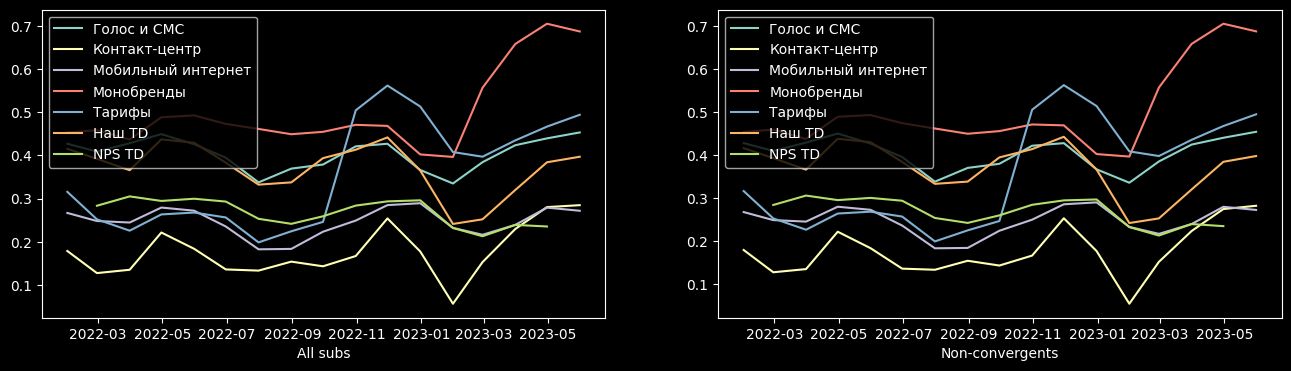

In [14]:
df['create_date'] = pd.to_datetime(df['create_date'])
# создаем график
#fig, ax = plt.subplots(figsize=(12,4))
fig, ax = plt.subplots(ncols=2, figsize=(16,4))
# группируем данные по точке продаж и дню создания, далее для каждой уникальной категории рисуем свою линию на графике
for point in df['point_name'].unique():
    df_grouped = df[df['point_name'] == point].groupby(pd.Grouper(key='create_date', freq='M')).agg({"subs_id": "count", "diff_day": "count", "nps_key": "mean"})
    ax[0].plot(df_grouped.index, df_grouped['nps_key'], label=point)

for point_ in df['point_name'].unique():
    df_grouped_ = df.query("flg_conv == 0")[df['point_name'] == point_].groupby(pd.Grouper(key='create_date', freq='M')).agg({"subs_id": "count", "diff_day": "count", "nps_key": "mean"})
    ax[1].plot(df_grouped_.index, df_grouped_['nps_key'], label=point_)

# добавляем легенду на график
ax[0].legend()
ax[1].legend()
# Убираем сетку
ax[0].grid(False)
ax[1].grid(False)

ax[0].set_xlabel("All subs")
ax[1].set_xlabel("Non-convergents")

# отображаем график
plt.show()

Помесячная динамика абонентов

(22г. -  бессмыленный для оценки, основная масса новых абонентов в 1q 23года )

C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_13260\3654030245.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grouped = df.query("flg_conv == 0")[df['point_name'] == point].groupby(pd.Grouper(key='create_date', freq='M')).agg({"subs_id": "count", "diff_day": "count", "nps_key": "mean"})
C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_13260\3654030245.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grouped = df.query("flg_conv == 0")[df['point_name'] == point].groupby(pd.Grouper(key='create_date', freq='M')).agg({"subs_id": "count", "diff_day": "count", "nps_key": "mean"})
C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_13260\3654030245.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grouped = df.query("flg_conv == 0")[df['point_name'] == point].groupby(pd.Grouper(key='create_date', freq='M')).agg({"subs_id": "count", "diff_day": "count", "nps_key": "mean"}

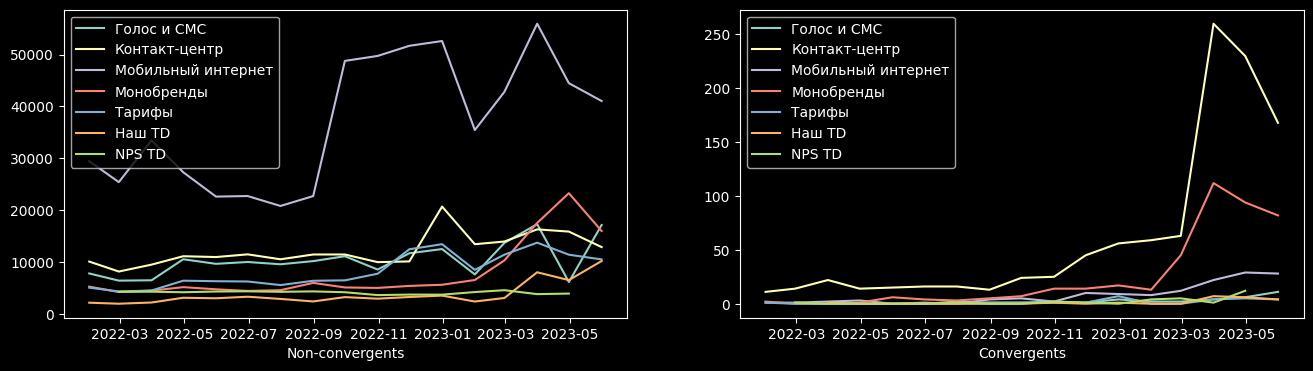

In [15]:
#df['create_date'] = pd.to_datetime(df['create_date'])
# создаем график
#fig, ax = plt.subplots(figsize=(12,4))
fig, ax = plt.subplots(ncols=2, figsize=(16,4))
# группируем данные по точке продаж и дню создания, далее для каждой уникальной категории рисуем свою линию на графике
for point in df['point_name'].unique():
    df_grouped = df.query("flg_conv == 0")[df['point_name'] == point].groupby(pd.Grouper(key='create_date', freq='M')).agg({"subs_id": "count", "diff_day": "count", "nps_key": "mean"})
    ax[0].plot(df_grouped.index, df_grouped['subs_id'], label=point)

for point_ in df['point_name'].unique():
    df_grouped_ = df.query("flg_conv == 1")[df['point_name'] == point_].groupby(pd.Grouper(key='create_date', freq='M')).agg({"subs_id": "count", "diff_day": "count", "nps_key": "mean"})
    ax[1].plot(df_grouped_.index, df_grouped_['subs_id'], label=point_)

# добавляем легенду на график
ax[0].legend()
ax[1].legend()
# Убираем сетку
ax[0].grid(False)
ax[1].grid(False)

ax[0].set_xlabel("Non-convergents")
ax[1].set_xlabel("Convergents")

# отображаем график
plt.show()

Динамика без разбивки на ТК

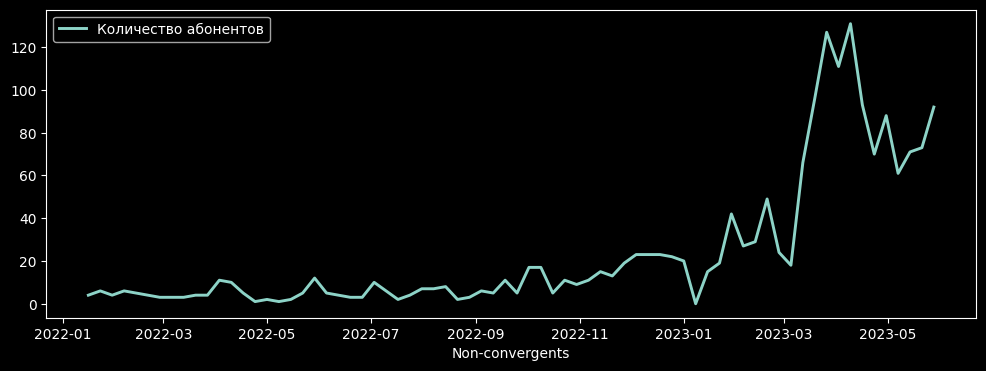

In [16]:
df_grouped = df.query("diff_day.notna()").groupby(pd.Grouper(key='create_date', freq='W')).agg({"subs_id": "count", "diff_day": "count", "nps_key": "mean"})
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(df_grouped.index, df_grouped['subs_id'], label="Количество абонентов", linewidth=2.1) # задаем текст для легенды и меняем толщину линии
ax.legend(loc='best')
# Убираем сетку
ax.grid(False)
ax.set_xlabel("Non-convergents")
# отображаем график
plt.show()

EDA конвергента


In [17]:
df_con.head()

,CREATE_DTTM,EVENT_DATE_TO_RTK,EVENT_DATE_INSTAL,ALLADIN_SYSTEM,LAST_STATUS_NAME,REASON,MSISDN_REQ,SUBS_ID,SERVICE_ID,service_name,SERVICE_STATUS_NAME,VALID_FROM_DTTM,STATUS_CHANGE_REASON_NAME,EVENT_DTTM_REQ,END_STATUS,GR_CHANNEL,abonent
0,2022-12-15 20:08:16,None,NaT,WD,Отменена,Не дозвонились абоненту (финальный звонок),79017428470,3.000468e+11,NaN,None,None,NaT,None,NaT,None,CBM,0
1,2023-05-17 09:52:59,None,NaT,WD,Отменена,Нет связи с клиентом,79822690465,1.000463e+11,NaN,None,None,NaT,None,NaT,None,CBM,0
2,2023-03-14 11:28:43,2023-03-14 11:45:03,2023-03-20 10:15:35,DSUITE,Инсталляция выполнена,Не указана,79637129964,3.000324e+11,27156.0,Домашний интернет 100 Мбит/с (MO),Активна,2023-03-20 10:16:47,Действия пользователя (пользовательская причин...,2023-03-20 10:15:35,Активна,DSUITE,1
3,2023-04-22 14:44:14,None,NaT,DSUITE,Отменена,Не дозвонились абоненту (финальный звонок),79516888808,1.524015e+07,NaN,None,None,NaT,None,NaT,None,DSUITE,0
4,2022-06-13 11:26:21,2022-06-13 12:14:17,2022-06-15 11:28:56,DSUITE,Инсталляция выполнена,Не указана,79774928577,3.000359e+11,27156.0,Домашний интернет 100 Мбит/с (MO),Активна,2022-06-15 11:29:56,Действия пользователя (пользовательская причин...,2022-06-15 11:28:56,None,DSUITE,1


кол-во subs, динамика

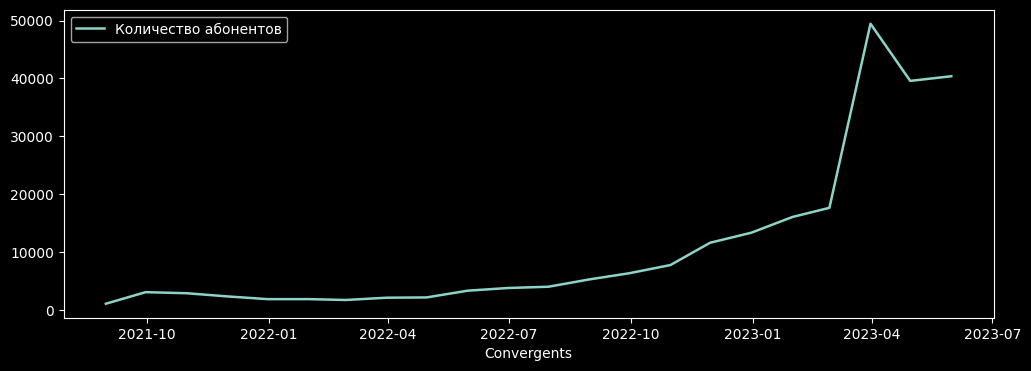

In [18]:
t = df_con.groupby(pd.Grouper(key='CREATE_DTTM', freq='M')).agg({"SUBS_ID": "count"})
fig, ax = plt.subplots(figsize=(12,4))
ax.plot( t['SUBS_ID'], label="Количество абонентов", linewidth=1.8) # задаем текст для легенды и меняем толщину линии
ax.legend(loc='best')
# Убираем сетку
ax.grid(False)
ax.set_xlabel("Convergents")
# отображаем график
plt.show()

Динамика по статусам

(Большое количество отмен, интересна причина) В целом, как и предполагалось, кратный рост подключений также приходится на 1 квартал 23г

C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_13260\273529544.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grouped = df_con.query("LAST_STATUS_NAME == 'Инсталляция выполнена'")[df_con['LAST_STATUS_NAME'] == 'Инсталляция выполнена'].groupby(pd.Grouper(key='CREATE_DTTM', freq='Q')).agg({"SUBS_ID": "count"})


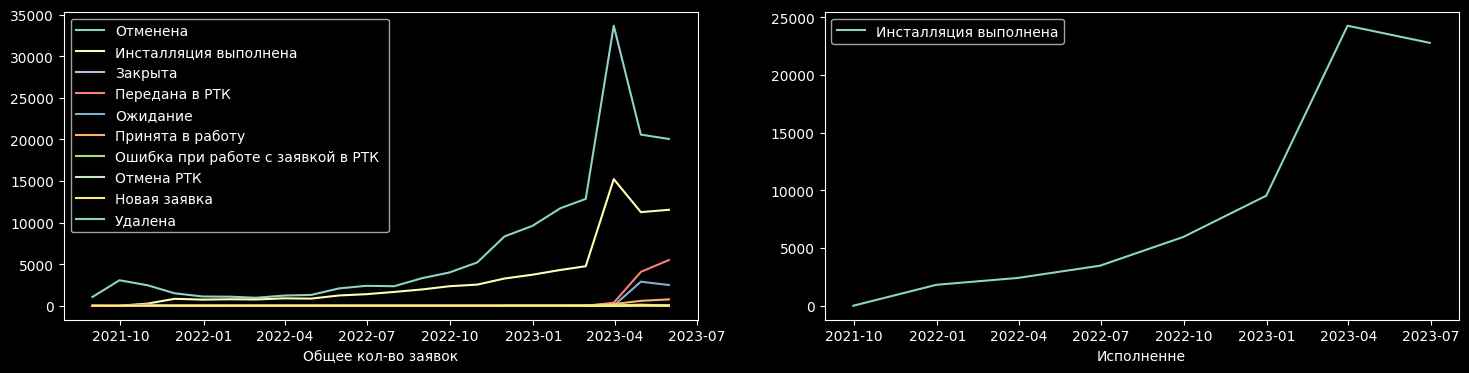

In [19]:
#t = df_con.groupby(pd.Grouper(key='CREATE_DTTM', freq='M')).agg({"SUBS_ID": "count"})
fig, ax = plt.subplots(ncols=2, figsize=(18,4))

for status in df_con['LAST_STATUS_NAME'].unique():
    df_grouped_ = df_con[df_con['LAST_STATUS_NAME'] == status].groupby(pd.Grouper(key='CREATE_DTTM', freq='M')).agg({"SUBS_ID": "count"})
    ax[0].plot(df_grouped_.index, df_grouped_['SUBS_ID'], label=status)

df_grouped = df_con.query("LAST_STATUS_NAME == 'Инсталляция выполнена'")[df_con['LAST_STATUS_NAME'] == 'Инсталляция выполнена'].groupby(pd.Grouper(key='CREATE_DTTM', freq='Q')).agg({"SUBS_ID": "count"})
ax[1].plot(df_grouped.index, df_grouped['SUBS_ID'], label="Инсталляция выполнена")

# добавляем легенду на график
ax[0].legend()
ax[1].legend()
# Убираем сетку
ax[0].grid(False)
ax[1].grid(False)
ax[0].set_xlabel("Общее кол-во заявок")
ax[1].set_xlabel("Исполненне")

# отображаем график
plt.show()

Считаем обущую конверсию

In [20]:
# количество уникальных абонентов
unique_subs = df_con['SUBS_ID'].nunique()

# количество подключенных услуг
connected_services = df_con[df_con['LAST_STATUS_NAME'] == 'Инсталляция выполнена']['SUBS_ID'].count()

# конверсия подключенных услуг
service_conversion = connected_services / unique_subs * 100

print('Количество уникальных абонентов:', unique_subs)
print('Количество подключенных услуг:', connected_services)
print('Конверсия подключенных услуг(в среднем):', service_conversion, '%')

Количество уникальных абонентов: 213361
Количество подключенных услуг: 70262
Конверсия подключенных услуг(в среднем): 32.93104175552234 %


Детализируем конверсию

In [21]:

# группировка по месяцу и статусу подключения услуги
monthly_data = df_con[["CREATE_DTTM", "LAST_STATUS_NAME", "SUBS_ID"]].groupby([pd.Grouper(key='CREATE_DTTM', freq='M'), 'LAST_STATUS_NAME']).count().reset_index()
# фильтрация по статусу "Инсталляция выполнена"
connected_services = monthly_data[monthly_data['LAST_STATUS_NAME'] == 'Инсталляция выполнена']

# группировка по месяцу и подсчет уникальных абонентов и их количество
grouped_data = df_con.groupby([pd.Grouper(key='CREATE_DTTM', freq='M')]).agg({'SUBS_ID': 'nunique', 'LAST_STATUS_NAME': 'count'}).reset_index()
# соединение данных с количеством подключенных услуг
final_data = pd.merge(grouped_data, connected_services[['CREATE_DTTM', 'SUBS_ID']], on='CREATE_DTTM', how='left')
final_data = final_data.rename(columns={'SUBS_ID_x': 'unique_subs', 'LAST_STATUS_NAME': 'total_subs', 'SUBS_ID_y': 'connected_services'})
# вычисление конверсии для каждого месяца
final_data['service_conversion'] = final_data['connected_services'] / final_data['unique_subs'] * 100

# вывод данных
final_data

,CREATE_DTTM,unique_subs,total_subs,connected_services,service_conversion
0,2021-08-31,1016,1397,6,0.590551
1,2021-09-30,2863,3686,1,0.034928
2,2021-10-31,2678,3255,256,9.559373
3,2021-11-30,2220,2612,831,37.432432
4,2021-12-31,1778,1968,734,41.282340
5,2022-01-31,1787,2026,776,43.424734
6,2022-02-28,1644,1908,751,45.681265
7,2022-03-31,2004,2252,887,44.261477
8,2022-04-30,2083,2231,855,41.046567
9,2022-05-31,3168,3448,1234,38.952020


Динамика на графике

(очевидное снижение конверсии, негативный тренд, что в дальнейшем может перерасти в негативный фактор для NPS, если не выявить причины(снижение качества продукта, нецелевой трафик, изменение поведения пользователей) и не устранить)

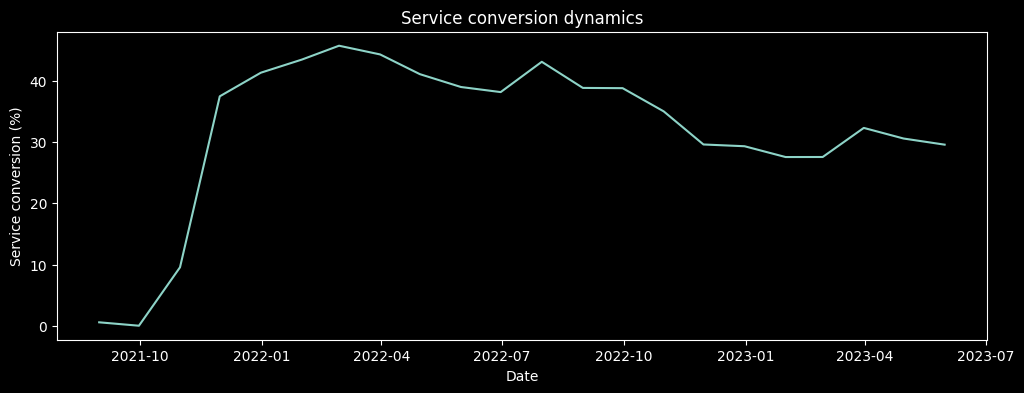

In [22]:
fig, ax = plt.subplots(figsize=(12,4))
plt.plot(final_data['CREATE_DTTM'], final_data['service_conversion'])
plt.title('Service conversion dynamics')
plt.xlabel('Date')
plt.ylabel('Service conversion (%)')
ax.grid(False)
plt.show()

Прогноз

In [128]:
data = df.copy()
data.head()

,create_date,cluster_name,macroregion,region,branch_id,subs_id,msisdn,point_name,nps,nps_key,...,age_gr,gender,CREATE_DTTM,EVENT_DATE_TO_RTK,EVENT_DATE_INSTAL,ALLADIN_SYSTEM,LAST_STATUS_NAME,REASON,diff_day,flg_conv
0,2022-11-30,Challenger,Урал,Екатеринбург,99.0,3.000007e+11,79505629758,Голос и СМС,10,1.0,...,46-55,Ж,NaT,None,NaT,None,None,None,NaN,0
1,2023-02-16,Defender,Волга,Н.Новгород,13.0,2.000846e+11,79200410377,Контакт-центр,9,1.0,...,36-45,М,NaT,None,NaT,None,None,None,NaN,0
2,2022-12-01,Challenger,Сибирь,Новосибирск,23.0,1.000608e+11,79014587512,Мобильный интернет,1,-1.0,...,46-55,Ж,NaT,None,NaT,None,None,None,NaN,0
3,2022-04-04,Challenger,Юг,Волгоград,64.0,6.208242e+07,79023855002,Мобильный интернет,10,1.0,...,36-45,Ж,NaT,None,NaT,None,None,None,NaN,0
4,2023-02-20,Challenger Elite,Сибирь,Томск,24.0,1.000230e+11,79539132401,Мобильный интернет,10,1.0,...,46-55,М,NaT,None,NaT,None,None,None,NaN,0


In [129]:
display(data.groupby(['point_name']).agg({'subs_id': "count"}))
display(data.query("flg_conv == 1 & create_date >= '2023-01-01' ").groupby(['point_name']).agg({'subs_id': "count"}))

,subs_id
point_name,
NPS TD,61721
Голос и СМС,176404
Контакт-центр,209031
Мобильный интернет,627321
Монобренды,133988
Наш TD,64146
Тарифы,140467


,subs_id
point_name,
NPS TD,22
Голос и СМС,25
Контакт-центр,780
Мобильный интернет,99
Монобренды,346
Наш TD,17
Тарифы,13


Считаем влияние абонентов конвергента на общий NPS, без разбивок на ТК, т.к. количество абонентов не позволяют это сделать. Но добаляем месячный разрез, т.к. данные по конвергенту 22г. - "мусорные".

Вывод: Максимальне влияние на NPS, абоненты конвергента оказали в апреле 23г. - 0,22 %. 


In [140]:
point = ["Контакт-центр", "Мобильный интернет", "Монобренды"]
data = data.query("point_name == @point ") 

In [163]:
# Приведем столбец с датой к типу datetime
data['date'] = pd.to_datetime(data['create_date'], format='%Y-%m-%d')
# Агрегируем данные по месяцам и посчитаем средний NPS и число абонентов с flg_conv=1
grouped_data = data[data['flg_conv'] == 1].groupby(data['date'].dt.to_period('M')).agg({'nps_key': 'mean', 'subs_id': 'nunique'}).reset_index()

# Создадим новый DataFrame, куда добавим столбец с общим числом абонентов
total_subs = data.groupby(data['date'].dt.to_period('M')).agg({'nps_key': 'mean', 'subs_id': 'nunique'}).reset_index()
grouped_data = pd.merge(grouped_data, total_subs, on='date')
# Добавим столбец с долей абонентов с flg_conv=1
grouped_data['conv_share'] = grouped_data['subs_id_x'] / grouped_data['subs_id_y']
# Добавим столбец с влиянием на общий NPS
grouped_data['nps_impact'] = grouped_data['conv_share'] * grouped_data['nps_key_y']
# Умножим nps_impact на 100, чтобы получить проценты
grouped_data['nps_impact_pct'] = grouped_data['nps_impact'] * 100
# Округлим результат до двух знаков после запятой
grouped_data['nps_impact_pct'] = grouped_data['nps_impact_pct'].round(2)
# Оставим только нужные столбцы
display(grouped_data)
#result = grouped_data[['date', 'nps_key_x', 'nps_key_y',	'subs_id_x',	'subs_id_y', 'nps_impact_pct']]
#result

C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_13260\3983316566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['create_date'], format='%Y-%m-%d')


,date,nps_key_x,subs_id_x,nps_key_y,subs_id_y,conv_share,nps_impact,nps_impact_pct
0,2022-01,0.428571,14,0.268809,44820,0.000312,0.000084,0.01
1,2022-02,0.466667,15,0.245424,37782,0.000397,0.000097,0.01
2,2022-03,0.500000,23,0.240779,47474,0.000484,0.000117,0.01
3,2022-04,0.611111,18,0.289262,43604,0.000413,0.000119,0.01
4,2022-05,0.809524,20,0.274074,38339,0.000522,0.000143,0.01
5,2022-06,0.476190,21,0.233048,38653,0.000543,0.000127,0.01
6,2022-07,0.578947,19,0.203518,35887,0.000529,0.000108,0.01
7,2022-08,0.590909,22,0.214579,40167,0.000548,0.000118,0.01
8,2022-09,0.416667,36,0.227297,65377,0.000551,0.000125,0.01
9,2022-10,0.707317,39,0.253632,64769,0.000602,0.000153,0.02


среднее и средне-медианное влияние на NPS за 2 года

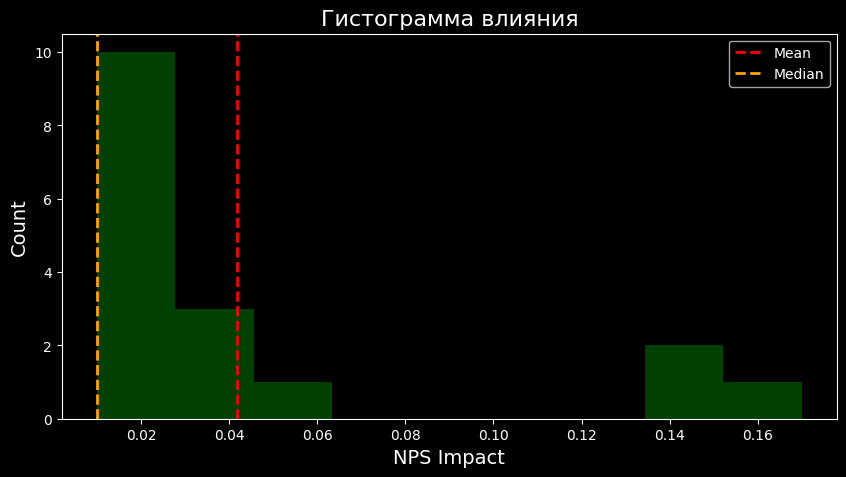

In [142]:
plt.figure(figsize=(10,5))
plt.hist(grouped_data['nps_impact_pct'], bins=9, alpha=0.5, color='green')

plt.axvline(grouped_data['nps_impact_pct'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(grouped_data['nps_impact_pct'].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')

plt.xlabel('NPS Impact', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Гистограмма влияния', fontsize=16)
plt.legend()
plt.show()

прогноз, как изменится общий NPS при изменении доли абонентов с услугой конвергент

In [ ]:
# Отфильтруем данные, чтобы они содержали только информацию за последний год
last_year_data =grouped_data[(grouped_data['date'] > '2022-12') & (grouped_data['date'] < '2023-05')]
# Создаем пустой DataFrame с нужными столбцами
forecast_table = pd.DataFrame(columns=['percent_change', 'new_nps'])
# Устанавливаем текущее значение nps_impact_pct и называет столбцы DataFrame
nps_impact_pct = last_year_data['nps_impact_pct'].mean()
old_nps = last_year_data['nps_key_y'].mean()
forecast_table.loc[0] = [0, old_nps]
# Прогнозируем новые значения
for i in range(1, 21):
    change_percent = i
    new_nps = old_nps + (nps_impact_pct * old_nps * change_percent / 100)
    forecast_table.loc[i] = [i, new_nps]
# Выводим DataFrame с прогнозными значениями
forecast_table
#В результате выполнения этого кода будет создан DataFrame "forecast_table", состоящий из двух столбцов: "percent_change" и "new_nps". Строки в DataFrame соответствуют прогнозным значениям для каждого процента изменения доли "nps_impact_pct" в интервале от 1 до 20. Нулевая строка содержит текущее значение общего NPS.


визуализация результатов влияния 

In [ ]:

# визуализация результатов влияния 
plt.plot(forecast_table['percent_change'], forecast_table['new_nps'], 'b')
plt.title('Forecasted NPS vs Percent Change')
plt.xlabel('Percent Change')
plt.ylabel('Forecasted NPS')
plt.grid(True)
plt.show()

абоны только определенных тк, за 23 год

In [318]:
grouped_data = grouped_data[(grouped_data['date'] > '2022-12') & (grouped_data['date'] < '2023-05')]
base_nps = grouped_data['nps_key_y'].mean()
total_count = grouped_data['subs_id_y'].sum()
total_conv_count = grouped_data['subs_id_x'].sum()
base_conv_share = total_conv_count / total_count
# Задаём интервал изменения доли flg_conv=1
start_share = base_conv_share
end_share = 0.3
share_step = 0.0001
share_range = np.arange(start_share, end_share + share_step, share_step)
# Создаём пустой DataFrame для прогнозирования
forecast_table = pd.DataFrame(columns=['percent_change', 'new_nps'])
# Заполняем DataFrame с новыми значениями
for change_share in share_range:
    new_nps = base_nps * (1 + (change_share - base_conv_share))
    percent_change = (change_share - base_conv_share) / base_conv_share * 100
    forecast_table.loc[len(forecast_table)] = {'percent_change': percent_change, 'new_nps': new_nps}
# Выводим DataFrame с прогнозными значениями
forecast_table
#тест-проверка


,percent_change,new_nps
0,0.000000,0.295439
1,3.141778,0.295469
2,6.283556,0.295499
3,9.425333,0.295528
4,12.567111,0.295558
...,...,...
2965,9315.371111,0.383037
2966,9318.512889,0.383067
2967,9321.654667,0.383096
2968,9324.796444,0.383126


In [155]:
display(grouped_data)
display(grouped_data[(grouped_data['date'] > '2022-12') & (grouped_data['date'] < '2023-05')]['nps_key_y'].mean())

,date,nps_key_x,subs_id_x,nps_key_y,subs_id_y,conv_share,nps_impact,nps_impact_pct
12,2023-01,0.662500,79,0.208864,55504,0.001423,0.000297,0.03
13,2023-02,0.625000,120,0.255505,67210,0.001785,0.000456,0.05
14,2023-03,0.670051,393,0.319429,90188,0.004358,0.001392,0.14
15,2023-04,0.730878,353,0.397959,83996,0.004203,0.001672,0.17


0.29543941524329365

In [176]:
grouped_data = grouped_data[(grouped_data['date'] > '2022-12') & (grouped_data['date'] < '2023-05')]
grouped_data

,date,nps_key_x,subs_id_x,nps_key_y,subs_id_y,conv_share,nps_impact,nps_impact_pct
12,2023-01,0.662500,79,0.208864,55504,0.001423,0.000297,0.03
13,2023-02,0.625000,120,0.255505,67210,0.001785,0.000456,0.05
14,2023-03,0.670051,393,0.319429,90188,0.004358,0.001392,0.14
15,2023-04,0.730878,353,0.397959,83996,0.004203,0.001672,0.17


In [282]:
nps_conv = grouped_data.nps_key_x.mean()
print(f'средний NPS в 23г. у абонентов с конвергентом {nps_conv}')
nps_no_conv = grouped_data.nps_key_y.mean()
print(f'средний NPS в 23г. у абонентов без конвергентом {nps_no_conv}')
cnt_subs_no_conv =  grouped_data.subs_id_y.mean()
print(f'срднее количество опрошенных абонентов в месяц без конвергента {cnt_subs_no_conv}')
cnt_subs_conv =  grouped_data.subs_id_x.mean()
print(f'срднее количество опрошенных абонентов в месяц c конвергентом {cnt_subs_conv}')
share_con =cnt_subs_conv / cnt_subs_no_conv
print(f'доля абонентов с конвергентом в опросах {share_con}')
share_con =cnt_subs_conv / cnt_subs_no_conv
print(f'доля абонентов с конвергентом {share_con}')
share_no_con = 1 - share_con
print(f'доля абонентов без конвергента {share_no_con}')
as_is_nps_no_conv =nps_no_conv * (1- share_con)
print(f'NPS абонентов без конвергента {as_is_nps_no_conv}')
as_is_nps_conv =nps_conv * share_con
print(f'NPS абонентов с конвергентом {as_is_nps_conv}')
as_is_total = as_is_nps_conv +  as_is_nps_no_conv
print(f'NPS total:  {as_is_total}')

средний NPS в 23г. у абонентов с конвергентом 0.6721072370975396
средний NPS в 23г. у абонентов без конвергентом 0.29543941524329365
срднее количество опрошенных абонентов в месяц без конвергента 74224.5
срднее количество опрошенных абонентов в месяц c конвергентом 236.25
доля абонентов с конвергентом в опросах 0.0031829113028716935
доля абонентов с конвергентом 0.0031829113028716935
доля абонентов без конвергента 0.9968170886971283
NPS абонентов без конвергента 0.29449905778920193
NPS абонентов с конвергентом 0.002139257721699624
NPS total:  0.2966383155109016


In [ ]:
# Вычисление значений nps_conv, nps_no_conv, cnt_subs_conv, cnt_subs_no_conv и share_con на основе данных таблицы grouped_data
nps_conv = grouped_data.nps_key_x.mean()
nps_no_conv = grouped_data.nps_key_y.mean()
cnt_subs_no_conv = grouped_data.subs_id_y.mean()
cnt_subs_conv = grouped_data.subs_id_x.mean()
share_con = cnt_subs_conv / (cnt_subs_no_conv + cnt_subs_conv)
# share_no_con - доля абонентов, у которых услуга не подключена
share_no_con = 1 - share_con 

# Вычисление ожидаемых значений NPS
as_is_nps_no_conv = nps_no_conv * share_no_con
as_is_nps_conv = nps_conv * share_con
as_is_total = as_is_nps_conv + as_is_nps_no_conv

# Прогнозирование значений To Be при изменении share_con и share_no_con
to_be_values = []
for i in range(60):
    to_be_share_con = share_con + 0.005 * i
    to_be_share_no_con = 1 - to_be_share_con
    to_be_cnt_subs_no_conv = cnt_subs_no_conv * to_be_share_no_con / (1 - share_con + 0.001 * i)
    to_be_cnt_subs_conv = cnt_subs_conv * to_be_share_con / (share_con + 0.001 * i)
    to_be_nps_no_conv = nps_no_conv * to_be_share_no_con
    to_be_nps_conv = nps_conv * to_be_share_con / to_be_share_no_con
    #to_be_total = to_be_nps_no_conv * to_be_share_no_con + to_be_nps_conv * to_be_share_con
    to_be_total = (nps_conv * to_be_cnt_subs_conv + nps_no_conv * to_be_cnt_subs_no_conv) / (to_be_cnt_subs_conv + to_be_cnt_subs_no_conv) * 100
    
    to_be_values.append({'share_con': to_be_share_con, 
                         'share_no_con': to_be_share_no_con, 
                         'to_be_nps_no_conv': to_be_nps_no_conv, 
                         'to_be_nps_conv': to_be_nps_conv, 
                         'to_be_total': to_be_total,
                         'to_be_cnt_subs_no_conv': to_be_cnt_subs_no_conv,
                         'to_be_cnt_subs_conv': to_be_cnt_subs_conv})
    
# Преобразование списка словарей в датафрейм
df_to_be_values = pd.DataFrame(to_be_values)

# Вывод датафрейма на экран
df_to_be_values

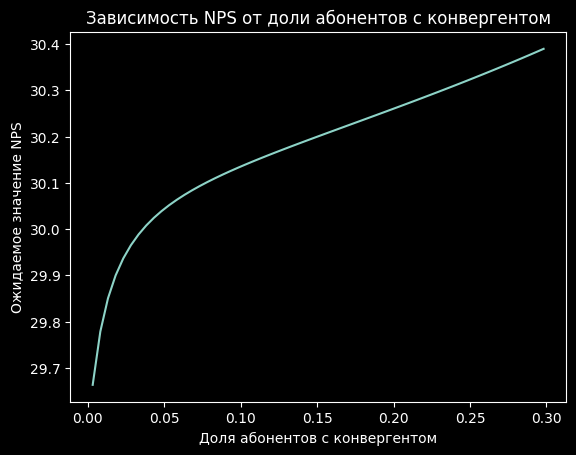

In [372]:
# Визуализация зависимости to_be_total от share_con
plt.plot(df_to_be_values['share_con'], df_to_be_values['to_be_total'])
plt.xlabel('Доля абонентов с конвергентом')
plt.ylabel('Ожидаемое значение NPS')
plt.title('Зависимость NPS от доли абонентов с конвергентом')
plt.show()

In [ ]:
'''to_be_total - это прогнозное значение NPS при измененных долях абонентов с подключенной и не подключенной услугой (to_be_share_con и to_be_share_no_con соответственно). Для его вычисления мы используем формулу расчета взвешенного среднего NPS:

to_be_total = (nps_conv * to_be_cnt_subs_conv + nps_no_conv * to_be_cnt_subs_no_conv) / (to_be_cnt_subs_conv + to_be_cnt_subs_no_conv) * 100
Здесь:

nps_conv - среднее значение NPS для абонентов с подключенной услугой;
nps_no_conv - среднее значение NPS для абонентов без подключенной услуги;
to_be_cnt_subs_conv - количество абонентов с подключенной услугой при измененных долях (to_be_share_con и to_be_share_no_con);
to_be_cnt_subs_no_conv - количество абонентов без подключенной услуги при измененных долях.
Для расчета to_be_cnt_subs_no_conv мы используем следующую формулу:

to_be_cnt_subs_no_conv = cnt_subs_no_conv * to_be_share_no_con / (1 - share_con + 0.001 * i)
Здесь cnt_subs_no_conv - среднее количество абонентов без подключенной услуги, to_be_share_no_con - измененная доля абонентов без услуги, share_con - исходная доля абонентов с услугой.

Мы добавляем 0.001 * i к знаменателю, чтобы избежать деления на 0 в случае, если share_con или to_be_share_con равны 0 или очень малы.

Для расчета to_be_cnt_subs_conv мы используем аналогичную формулу:

to_be_cnt_subs_conv = cnt_subs_conv * to_be_share_con / (share_con + 0.001 * i)
Здесь cnt_subs_conv - среднее количество абонентов с подключенной услугой, to_be_share_con - измененная доля абонентов с услугой, share_con - исходная доля абонентов с услугой.

Здесь также добавляем 0.001 * i к знаменателю, чтобы избежать деления на 0.

Итоговое значение to_be_total умножается на 100, чтобы привести его к виду процентов.'''